In [1]:
from geoarray import GeoArray
from arosics import COREG_LOCAL
from arosics import COREG
import os
import string 
import urllib.parse
from urllib.request import pathname2url
from pathlib import Path
import pandas
import numpy

### Fix projection of base file 

- Projection matching is not done in arosics 
- Projection mismatch is only flagged and not corrected 

In [2]:
from osgeo import gdal
# Change the following variables to the file you want to convert (inputfile)
# and what you want to name your output file (outputfile)
inputfile =  r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\1_4.tif"
outputfile = "output.tif"
#Do not change the following line, it will reproject the geotiff file
ds = gdal.Warp(outputfile, inputfile, dstSRS="+proj=longlat +datum=WGS84 +no_defs")
print (inputfile,'\n',outputfile)

C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\1_4.tif 
 output.tif


In [3]:
input_target  = r"C:\Users\vasud\OneDrive\Desktop\Test_Images_set_1\3.tif"
output_target = "output_target"
ds = gdal.Warp(output_target, input_target, dstSRS="+proj=longlat +datum=WGS84 +no_defs")

In [4]:
im_reference = outputfile 
im_target = output_target

In [5]:
geoArr  = GeoArray(im_reference)
ref_ndarray = geoArr[:]            # numpy.ndarray with shape (10980, 10980)
ref_gt      = geoArr.geotransform  # GDAL geotransform: (300000.0, 10.0, 0.0, 5900040.0, 0.0, -10.0)
ref_prj     = geoArr.projection    # projection as WKT string ('PROJCS "WGS 84 / UTM zone 33N....')
geoArr  = GeoArray(im_target)

In [6]:
tgt_ndarray = geoArr[:]            # numpy.ndarray with shape (10980, 10980)
tgt_gt      = geoArr.geotransform  # GDAL geotransform: (300000.0, 10.0, 0.0, 5900040.0, 0.0, -10.0)
tgt_prj     = geoArr.projection    # projection as WKT string ('PROJCS["WGS 84 / UTM zone 33N....')

# create in-memory instances of GeoArray from the numpy array data, the GDAL geotransform tuple and the WKT
# projection string
geoArr_reference = GeoArray(ref_ndarray, ref_gt, ref_prj)
geoArr_target    = GeoArray(tgt_ndarray, tgt_gt, tgt_prj)

In [7]:
kwargs = {
    'grid_res'     : 100,
    'window_size'  : (16, 16),
    'max_shift' : 30,
    'q'            : False,
    'v'            : True,
    'min_reliability': 0,
    'tieP_filter_level': 1 ,
    'r_b4match': 1,
    's_b4match': 1
} 

#### LOCAL COREGISTRATION USING AROSICS 
- Moving window/kernel method, in contrast to the global window-transformation method 

Calculating footprint polygon and actual data corner coordinates for reference image...
Automatically detected nodata value for GeoArray_CoReg 'output': 0.0


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for reference image:
	(-103.75274067700511, 35.11359148808124, -103.70093951488073, 35.192588660144644)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(-103.71729921817263, 35.14451002706736, -103.7060726197758, 35.184769631965764)
resolutions:  4.729104795948601e-06 3.873980471576772e-06
100.00 percent of the image to be shifted is covered by the reference image.
Matching window position (X,Y): -103.71266734542662/35.16565894842819
Initializing tie points grid...
Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:06
Warping progress     |==================================================| 100.0% Complete  => 0:00:06


Calculating tie point grid (1221 points) using 12 CPU cores...


	progress: |==================================================| 100.0% Complete  => 0:02:48


Found 300 matches.
Performing validity checks...
0 tie points flagged by level 1 filtering (reliability).
300 valid tie points remain after filtering.
Visualizing CoReg points grid...
Note: array has been downsampled to 654 x 1000 for faster visualization.


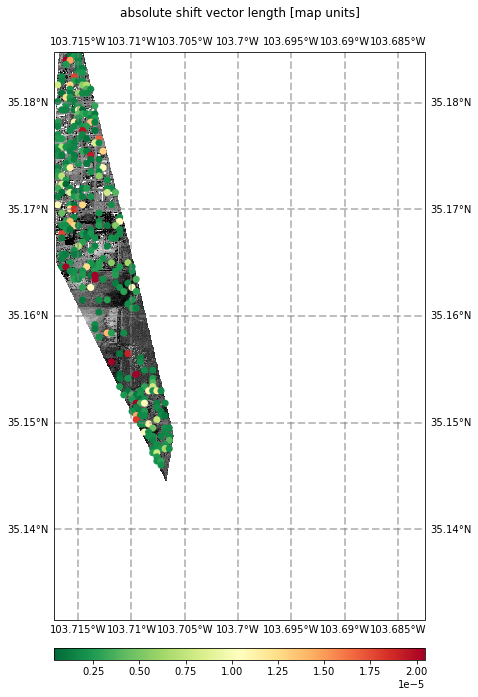

C:\Users\vasud\.conda\envs\coreg_build\lib\site-packages\arosics\DeShifter.py:296: UserWarning: 
The coordinate grid of output_target cannot be aligned to the desired grid because their pixel sizes are not exact multiples of each other (input [X/Y]: 3.873980471576772e-06/3.873980471576772e-06; desired [X/Y]: 4.729104801981521e-06/4.729104794876093e-06). Therefore the original grid is chosen for the resampled output image. If you don´t like that you can use the 'out_gsd' or 'match_gsd' parameters to set an appropriate output pixel size or to allow changing the pixel size.

  % (self.im2shift.basename, in_xgsd, in_ygsd, out_xgsd, out_ygsd))


Correcting geometric shifts...


Translating progress |==================================================| 100.0% Complete  => 0:00:00
Warping progress     |==================================================| 100.0% Complete  => 0:00:17


Time for shift correction: 26.64s
Note: array has been downsampled to 654 x 1000 for faster visualization.


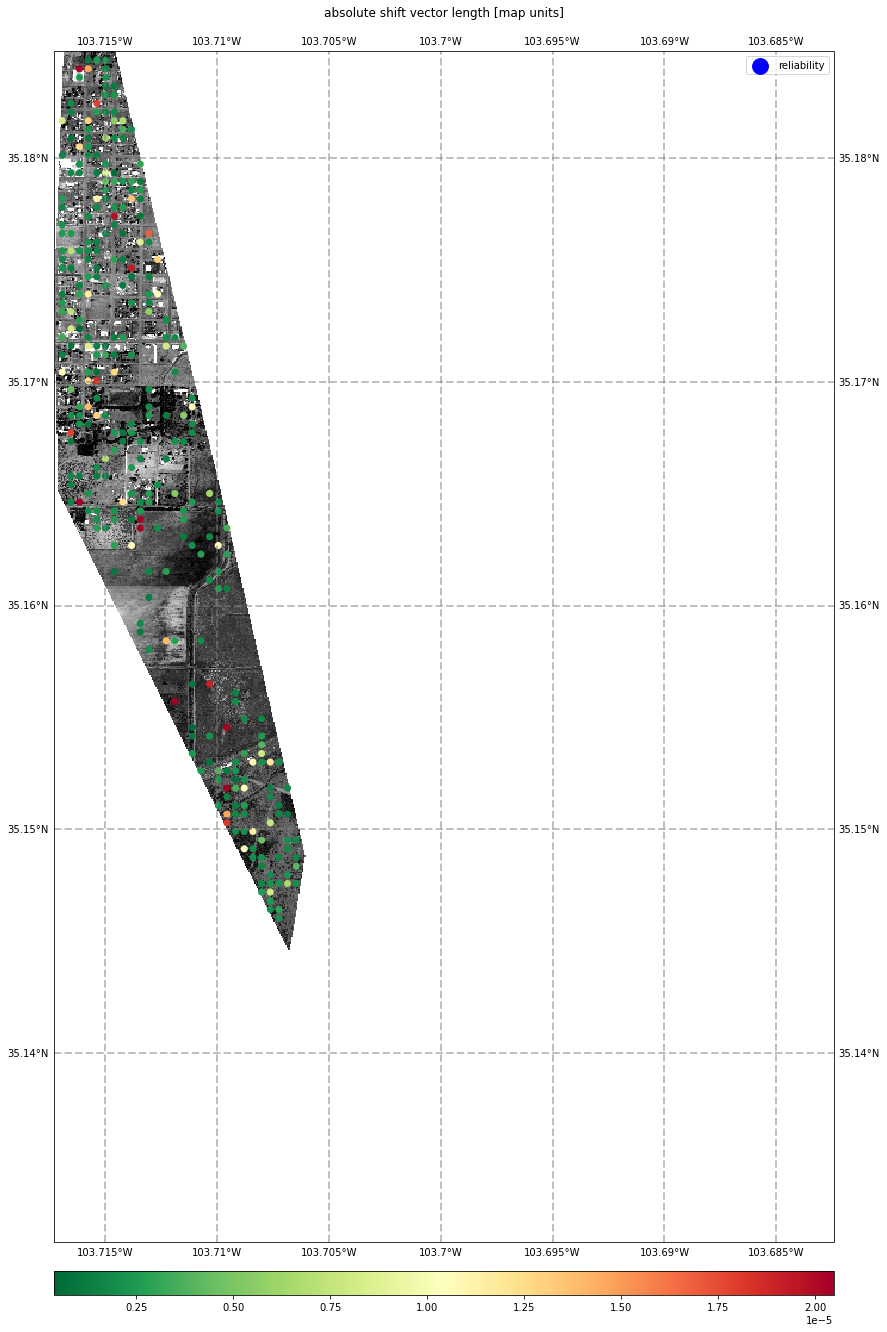

In [8]:
CRL = COREG_LOCAL(im_reference, im_target, **kwargs)
CRL.calculate_spatial_shifts()
CRL.correct_shifts() 
CRL.view_CoRegPoints(figsize=(20,20), backgroundIm='tgt', hide_filtered=False)

In [9]:
points_table = CRL.CoRegPoints_table
file_name = 'TiePointData.xlsx'
points_table.to_excel(file_name)

#### GLOBAL COREGISTRATION USING AROSICS 

In [10]:
CRL = COREG(im_reference, im_target)
CRL.calculate_spatial_shifts()
CRL.correct_shifts() 
#CRL.view_CoRegPoints(figsize=(20,20), backgroundIm='tgt', hide_filtered=False)

Calculating footprint polygon and actual data corner coordinates for reference image...
Automatically detected nodata value for GeoArray_CoReg 'output': 0.0


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:01


Bounding box of calculated footprint for reference image:
	(-103.75274067700511, 35.11359148808124, -103.70093951488073, 35.192588660144644)
Calculating footprint polygon and actual data corner coordinates for image to be shifted...


Polygonize progress     |==================================================| 100.0% Complete  => 0:00:00


Bounding box of calculated footprint for image to be shifted:
	(-103.71729921817263, 35.14451002706736, -103.7060726197758, 35.184769631965764)
Matching window position (X,Y): -103.71266734542662/35.16565894842819
Detected integer shifts (X/Y):                            -1/2
Detected subpixel shifts (X/Y):                           -0.4271911818294355/-0.41557527974858793
Calculated total shifts in fft pixel units (X/Y):         -1.4271911818294356/1.5844247202514121
Calculated total shifts in reference pixel units (X/Y):   -1.4271911818294356/1.5844247202514121
Calculated total shifts in target pixel units (X/Y):      -1.7422226860059642/1.9341632200615455
Calculated map shifts (X,Y):				  -6.749336662892347e-06/-7.492910540918274e-06
Calculated absolute shift vector length in map units:     1.0084505628104284e-05
Calculated angle of shift vector in degrees from North:   42.01135654640143
Original map info: ['Geographic Lat/Lon', 1.0, 1.0, -103.7173046026323, 35.184769631965764, 3.87

Warping progress     |==================================================| 100.0% Complete  => 0:00:20


OrderedDict([('band', None),
             ('is shifted', True),
             ('is resampled', True),
             ('updated map info',
              ['Geographic Lat/Lon',
               1.0,
               1.0,
               -103.71730360400801,
               35.1847660130357,
               3.8739804750775875e-06,
               3.8739804750775875e-06,
               'WGS-84']),
             ('updated geotransform',
              (-103.71730360400801,
               3.8739804750775875e-06,
               0.0,
               35.1847660130357,
               0.0,
               -3.8739804750775875e-06)),
             ('updated projection',
              'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
             ('arr_shifted',


In [11]:
CRL.equalize_pixGrids()

Equalizing pixel grids and projections of reference and target image...


Warping progress     |==================================================| 100.0% Complete  => 0:00:06
Warping progress     |==================================================| 100.0% Complete  => 0:00:06


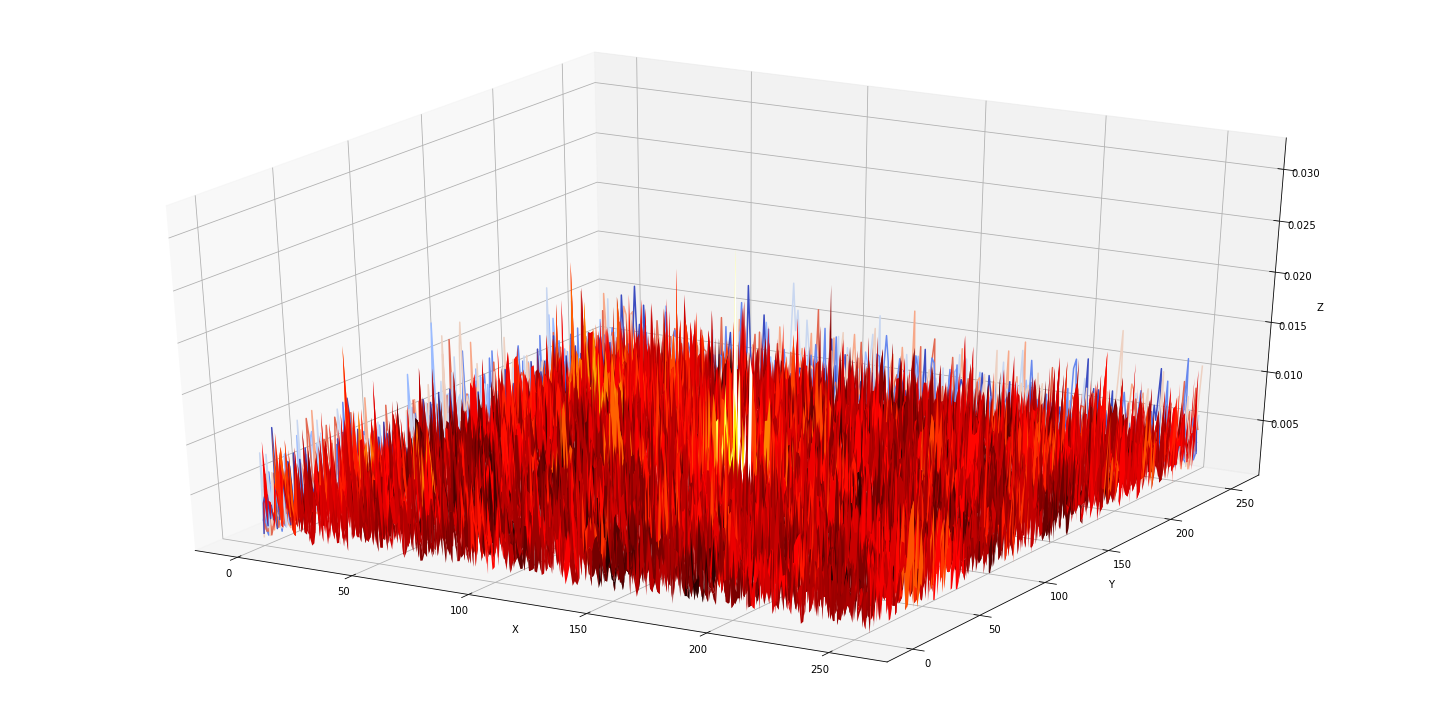

In [12]:
CRL.show_cross_power_spectrum()

In [13]:
CRL.show_image_footprints()

In [14]:
import arosics 

In [15]:
arosics.Tie_Point_Grid(CRL,grid_res=100)

Initializing tie points grid...


In [16]:
CRL.coreg_info

{'corrected_shifts_px': {'x': -1.7422226860059642, 'y': 1.9341632200615455},
 'corrected_shifts_map': {'x': -6.749336662892347e-06,
  'y': -7.492910540918274e-06},
 'original map info': ['Geographic Lat/Lon',
  1.0,
  1.0,
  -103.7173046026323,
  35.184769631965764,
  3.873980471576772e-06,
  3.873980471576772e-06,
  'WGS-84'],
 'updated map info': ['Geographic Lat/Lon',
  1.0,
  1.0,
  '-103.71731135196896',
  '35.18476213905522',
  3.873980471576772e-06,
  3.873980471576772e-06,
  'WGS-84'],
 'reference projection': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]',
 'reference geotransform': [-103.75274067700511,
  4.729104795948601e-06,
  0.0,
  35.192588660144644,
  0.0,
  -4.729104795948601e-06],
 'reference grid': [[-103.75274067700511, -103.7527359479003],
  [35.1925886601

In [17]:
CRL.correct_shifts()

Warping progress     |--------------------------------------------------| 0.0% Complete  => 0:00:00

Correcting geometric shifts...


Warping progress     |==================================================| 100.0% Complete  => 0:00:05


OrderedDict([('band', None),
             ('is shifted', True),
             ('is resampled', True),
             ('updated map info',
              ['Geographic Lat/Lon',
               1.0,
               1.0,
               -103.71729716465455,
               35.18476686816002,
               4.729104801981521e-06,
               4.729104794876093e-06,
               'WGS-84']),
             ('updated geotransform',
              (-103.71729716465455,
               4.729104801981521e-06,
               0.0,
               35.18476686816002,
               0.0,
               -4.729104794876093e-06)),
             ('updated projection',
              'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
             ('arr_shifted',
  

In [18]:
CRL.ssim_improved

True

In [20]:
CRL.equalize_pixGrids()